# Sprawozdanie symulowanie ruchu spacerowicza

Celem zadania jest zasymulowanie ruchu spacerowicza oraz policzenie miar dla rozkładu odległości taksówkowej jego ruchu oraz sprawdzenie czy statystycznie pozycja początkowa różni się od oczekiwanej końcowej pozycji wybranego kierunku np. północ-południe.

importujemy potrzebne biblioteki i piszemy podstawowe funkcje przydatne do zadania:

In [1]:
from scipy import stats
import random

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def chodzenie(liczba_przechodniów, start):
    visitedall =  []
    last_position = []
    for _ in range(liczba_przechodniów):
        number_of_steps= random.randint(tuple_steps[0], tuple_steps[1]+1)
        visited = []
        for i in range(number_of_steps):
            kierunek = random.choice(list(direction.keys()))
            new = (start[0] + direction[kierunek][0], start[1] + direction[kierunek][1])
            if 0 <= new[0] < max_pozycja and 0 <= new[1] < max_pozycja:
                start = new
                visited.append(start)
        last_position.append(visited[-1])
        visitedall.append(visited)
    return visitedall, last_position

In [3]:
def lenght_tax(last_position, start):
    return abs(last_position[0] - start[0]) + abs(last_position[1] - start[1])

Wyliczamy odległości taksówkowe dla każdej ilości wędrowców, aby później móc policzyć z niej miary, dodatkowo trzymamy ostatnią pozycje podróżnika, która przyda nam się do ostatniego punktu.

In [4]:
max_pozycja = 21
start = (11,11)
direction = {
    "North": (0,1),
    "South": (0,-1),
    "East": (-1,0),
    "West": (1,0)
}

tuple_steps = (91,100)
srednia_odleglosc = []
odchylenie_stan = []
odległośćcał = []
liczba_przechodniów = [100, 500, 1000]
last_positioncal = []

for lp in range(3):
    visitedall, last_position = chodzenie(liczba_przechodniów[lp], start)
    last_positioncal.append(last_position)
    odleglosc = []
    for _ in range(liczba_przechodniów[lp]):
        odleglosc.append(lenght_tax(last_position[_], start))
    odległośćcał.append(odleglosc)

Wyliczam 3 pierwsze efekty zadania:

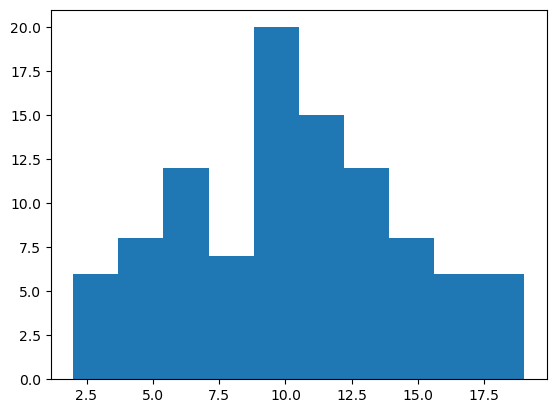

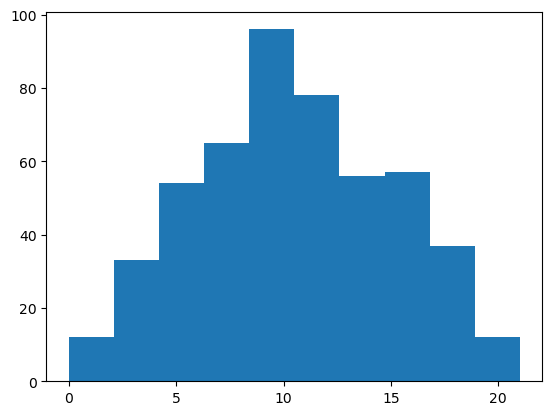

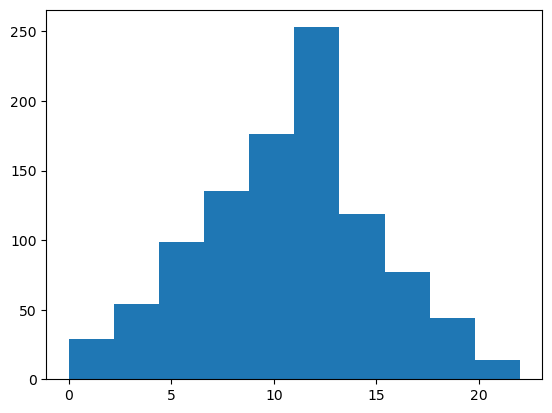

In [5]:
for i in range(3):
    srednia_odleglosc.append(np.mean(odległośćcał[i]))
    odchylenie_stan.append(np.std(odległośćcał[i]))
    plt.hist(odległośćcał[i])
    plt.show()

Wykres 1. histogramy rozkładu odległości wędrowców od środka planszy, czyli (11,11), dla 100, 500 i 1000 wędrowcow.

Wyświetlamy wyniki dla 3 efektów:

In [6]:
print(f"dla rokładu 100 wędrowców srednia {srednia_odleglosc[0]}")
print(f"dla rokładu 500 wędrowców srednia {srednia_odleglosc[1]}")
print(f"dla rokładu 1000 wędrowców srednia {srednia_odleglosc[2]}")
print(f"dla rokładu 100 wędrowców odch stan {odchylenie_stan[0]}")
print(f"dla rokładu 500 wędrowców odch stan {odchylenie_stan[1]}")
print(f"dla rokładu 1000 wędrowców odch stan {odchylenie_stan[2]}")

dla rokładu 100 wędrowców srednia 10.27
dla rokładu 500 wędrowców srednia 10.466
dla rokładu 1000 wędrowców srednia 10.613
dla rokładu 100 wędrowców odch stan 4.137281716296342
dla rokładu 500 wędrowców odch stan 4.355323638950382
dla rokładu 1000 wędrowców odch stan 4.307346166724936


### Sprawdzamy  czy oczekiwana końcowa pozycja w kierunku północ-południe statystycznie różni się od wartości początkowej

Kierunek północ-południe to oczywiście kierunek związany z y, więc porównujemy średnią wysokość dla rozkładu z 11

In [7]:
def wywoływanie_wynikowdla(last_positioncal):
    y_positions = [posit[1] for posit in last_positioncal]
    stat, p_value = stats.shapiro(y_positions)
    print("Statystyka testu:", stat)
    print("P-wartość:", p_value)
    
    alpha = 0.05
    if p_value > alpha:
        print("Dane mają rozkład normalny (nie odrzucamy hipotezy zerowej)")
    else:
        print("Dane nie mają rozkładu normalnego (odrzucamy hipotezę zerową)")
    
    print("\n")
    t_stat, p_value = stats.ttest_1samp(y_positions, popmean=11)
    print("t-statystyka:", t_stat)
    print("p-wartość:", p_value)
    
        
    # Wnioski
    if p_value < 0.05:
        print("Średnia końcowej pozycji w kierunku północ-południe statystycznie różni się od wartości początkowej 11.")
    else:
        print("Brak statystycznie istotnej różnicy w średniej końcowej pozycji w kierunku północ-południe w porównaniu do wartości początkowej 11.")

In [8]:
# y_positions = [posit[1] for posit in last_positioncal[2]]
# print(y_positions)
# print(np.mean(y_positions))
# print(np.std(y_positions))
# print(len(y_positions))

Sprawdzanie czy rozkłąd jest normalny i czy statystycznie różni się od wartości początkowej 11 dla 1000 wędrowców:

In [9]:
wywoływanie_wynikowdla(last_positioncal[2])

Statystyka testu: 0.9481026772306249
P-wartość: 2.846462630970525e-18
Dane nie mają rozkładu normalnego (odrzucamy hipotezę zerową)


t-statystyka: -4.349457289371866
p-wartość: 1.504741040847947e-05
Średnia końcowej pozycji w kierunku północ-południe statystycznie różni się od wartości początkowej 11.


Sprawdzanie tego samego tylko dla 5000 danych

In [10]:
visitedall, last_position1 = chodzenie(5000, start)
wywoływanie_wynikowdla(last_position1)

Statystyka testu: 0.9479939565907358
P-wartość: 7.614901548410084e-39
Dane nie mają rozkładu normalnego (odrzucamy hipotezę zerową)


t-statystyka: -11.592032041736706
p-wartość: 1.1128228132140808e-30
Średnia końcowej pozycji w kierunku północ-południe statystycznie różni się od wartości początkowej 11.


Rozkład nie przeszedł testu normalności Shapiro-Wilka i z tego powodu nie powiniśmy stosować testu studentu, dlatego, że w swoich założeniach test studenta ma, że dane mają rozkłąd normalny. Mimo tego dla tak dużej próby, czyli 1000 i 5000 wędrowców, test studenta dalej daje w miarę wiarygodne wyniki, dzięki centralemu twierdzeniu granicznemu.

Z wyżej wspomnianego powodu możemy stwierdzić, że średnia końcowej pozycji statystycznie różni się od wartości początkowej.
Sprawdżmy jeszcze co wychodzi jako średnia z danych i jakie ma odchylenie standardowe:


In [11]:
y_positions = [posit[1] for posit in last_positioncal[2]]
print(np.mean(y_positions))
print(np.std(y_positions))
print(len(y_positions))
print("\n")

y_positions = [posit[1] for posit in last_position1]
print(np.mean(y_positions))
print(np.std(y_positions))
print(len(y_positions))

10.159
6.111441646616615
1000


10.004
6.074930781498667
5000


Jak widzimy średnie dla wysokości odbiegają znacząco od 11, bliżej są 10 niż 11. Dane mają duże odchylenie standardowe, wartość 11 się w tym odchyleniu mieści, ale dla naszego poziomu istotności nie były średnie wystraczająco podobne.

In [12]:
stat, p_value = stats.shapiro(odległośćcał[2])
print("Statystyka testu:", stat)
print("P-wartość:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Dane mają rozkład normalny (nie odrzucamy hipotezy zerowej)")
else:
    print("Dane nie mają rozkładu normalnego (odrzucamy hipotezę zerową)")

Statystyka testu: 0.9911833674138812
P-wartość: 1.0746557681274934e-05
Dane nie mają rozkładu normalnego (odrzucamy hipotezę zerową)
